# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/israel/Documentos/Programación/Machine Learning/python-ml-course-master/datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

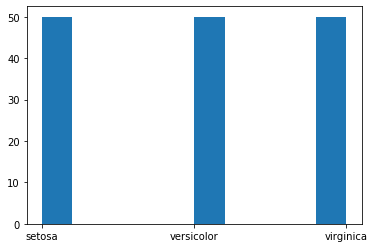

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
import numpy as np

In [8]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

(array([ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

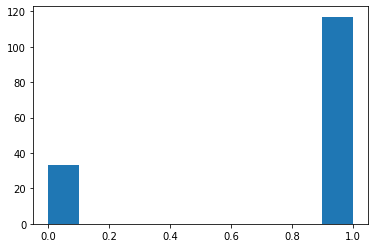

In [9]:
plt.hist(data.is_train.astype(int))

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,9,0,0
versicolor,0,11,0
virginica,0,2,11


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open("/home/israel/Documentos/Programación/Machine Learning/python-ml-course/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [17]:
import os
from graphviz import Source

In [18]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.584\\nsamples = 117\\nvalue = [41, 39, 37]"] ;\n1 [label="entropy = 0.0\\nsamples = 41\\nvalue = [41, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 76\\nvalue = [0, 39, 37]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.35\\nentropy = 0.454\\nsamples = 42\\nvalue = [0, 38, 4]"] ;\n2 -> 3 ;\n4 [label="Sepal.Width <= 2.55\\nentropy = 0.286\\nsamples = 40\\nvalue = [0, 38, 2]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.65\\nsamples = 12\\nvalue = [0, 10, 2]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 28\\nvalue = [0, 28, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.191\\nsamples = 34\\nvalue = [0, 1, 33]"] ;\n2 -> 8 ;\n9 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n8 ->

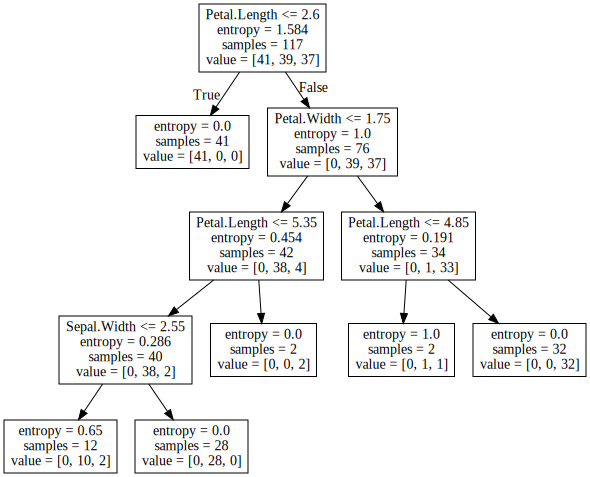

In [19]:
Source(text)

## Cross Validation para la poda

In [20]:
X = data[predictors]
Y = data[target]

In [21]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [22]:
from sklearn.model_selection import KFold

In [23]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(tree,X,Y,scoring = "accuracy",cv =cv, n_jobs = 1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [26]:
score = np.mean(cross_val_score(tree,X,Y,scoring = "accuracy",cv =cv, n_jobs = 1))

In [27]:
score

0.9333333333333333

In [28]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
    scores = cross_val_score(tree,X,Y,scoring = "accuracy",cv =cv, n_jobs = 1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ",score)
    print("  ",tree.feature_importances_)

    


Score para i =  1  es de  0.5666666666666667
   [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
   [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
   [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]


In [29]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [34]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [36]:
forest.oob_score_ # Hemos llegado a un score un poco mas alto que el que vimos anteriormente con arboles de 
#desición

0.96